# Непрерывные модели

Непрерывные модели описываются дифференциальными уравнениями. Общий вид уравнения первого порядка:
$$
\frac{dx}{dt} = F(x,t)
$$
Одно из фундаментальных допущений в непрерывных моделях в том, что траектория состояния системы является гладким на всей области фазового пространства. Таким образом непрервыные модели не проявляют мгновенных резких изменений, которые могут происходить в дискретных моделях.

Системы **первого порядка** описываются моделями, дифференциальные уравнения которых не содержат производных высшего порядка.
**Автономные** дифференциальные уранвения не содержат в правой части явно время. 

Неавтономные дифференциальные уравнения высших порядков могут быть сведены к автономным уравнениям первого порядка.

Линейные динамические системы могут проявлять только экспоненсиальный рост/затухание, периодические осцилляции, стационарные состояния и их гибриды. Линейные уравнения всегда могут быть решены аналитически, чего не скажешь о нелинейных.

## Связь между непрерывными и дискретными моделями
Модели с непрерывным временем и модели с дискретным временем — это разные математические модели с разными математическими свойствами. Но все еще возможно разработать "подобную" модель с непрерывным временем из модели с дискретным временем и наоборот. Вот правила перехода:

<img src="images/discrete-continuous.jpg">

Стоит однако подчеркнуть, что это дискретная и "подобная" ей непрерывная модели являются эквивалентными. Это просто значит, что модели сконструированны в соответствии с похожими допущениями и они могут *иметь* похожие свойства. 

## Симуляция непрерывных моделей
Симуляция непрерывной модели эквивалентна численному интегрированию дифференциального уравнения. Существует множество методов, но мы рассмотрим самый простой метод - **прямой метод Эйлера**, который позволяет произвести переход к дискретному аналогу модели, как это было показано выше. Так для дифференциального уравнения $\frac{dx}{dt}=G(x)$ численное решение запишется
$$
x(t+\Delta t) = x(t) + G(x(t)) \Delta t
$$
Рассмотрим пример симуляции непрерывной модели **logistic growth** для $0 \leq t < 50$ при $x(0)=0.1, \space r=0.2, \space K=1$ и $\Delta t=0.01$:
$$
\frac{dx}{dt}=rx \left(1 - \frac{x}{K} \right)
$$
дискртизируем время и получим разностное уравнение:
$$
x(t+\Delta t)=x(t)+rx(t)\left(1-\frac{x(t)}{K}\right)\Delta t
$$


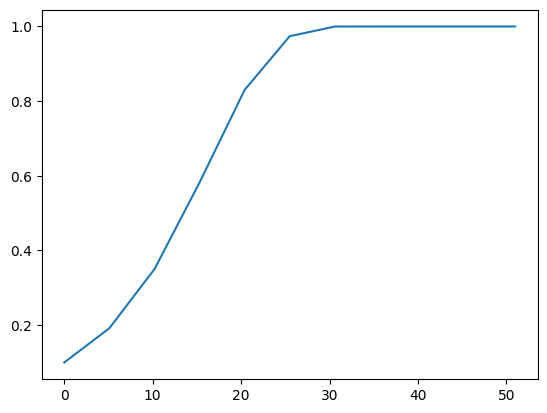

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.2
k = 1.0
dt = 5.1

def update(x):
    return x + r*x * (1 - x/k) * dt

x = 0.1
t = 0.0
xs, ts = [x], [t]

while t < 50:
    x = update(x)
    t += dt
    xs.append(x)
    ts.append(t)

plt.plot(ts, xs)

## Поиск точек равновесия
Для точек равновесия характерно $dx/dt = 0$. Так, для logistic growth:
$$
0=rx_{eq}\left(1-\frac{x_{eq}}{K}\right)
$$
Это уравнение имеет два решения: 0 и $K$.

## Визуализация фазового пространства
Для визуализации двумерного фазового пространства можно использовать функцию [`streamplot(x, y, u, v)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html), которая рисует потоковые линии векторов. Для начала нужно создать равномерную сетку `x`, `y`. Можно передать одномерные массивы координат, либо двумерные массивы, полученные из `meshgrid()`. `u`, `v` - двумерные массивы, задающие компоненты векторов, формы этих массивов должны соответствовть заданной сетке `x`, `y`.

### Модель хищник-жертва
Визуализируем фазовое пространство модели хищник жертва (*predator-prey*):
$$
\frac{dx}{dt} = x-xy
$$
$$
\frac{dy}{dt} = -y+xy
$$
Траектории в фазовом пространстве задаются векторами 
$$
\mathbf v = \left( \frac{dx}{dt}, \frac{dy}{dt} \right)
$$
в каждой точке $\mathbf r=(x,y)$ сетки

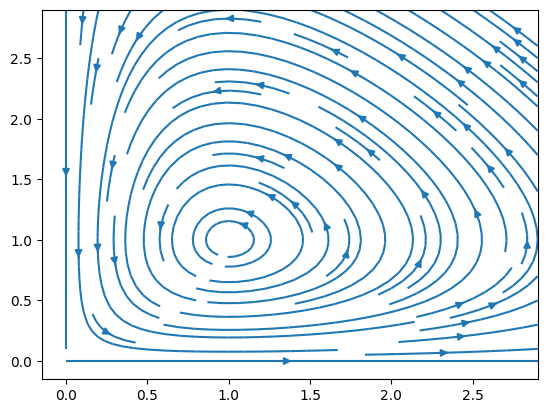

In [3]:
xgrid, ygrid = np.meshgrid(np.arange(0, 3, 0.1), np.arange(0, 3, 0.1))

u = xgrid - xgrid*ygrid
v = -ygrid + xgrid*ygrid
plt.streamplot(xgrid, ygrid, u, v)

### Модель маятника
$$
\frac{d^2 \phi}{dt^2} = - \frac{g}{L} \sin \phi
$$
Преобразуем в модель первого порядка введя новую переменную состояния
$$
\frac{d\phi}{dt} = \omega
$$
$$
\frac{d \omega}{dt} = - \frac{g}{L} \sin \phi
$$
`xgrid` будет содержать множество значений $\phi$, а `ygrid` - множество значений $\omega = \dot \phi$.

Text(0, 0.5, '$\\dot \\phi$')

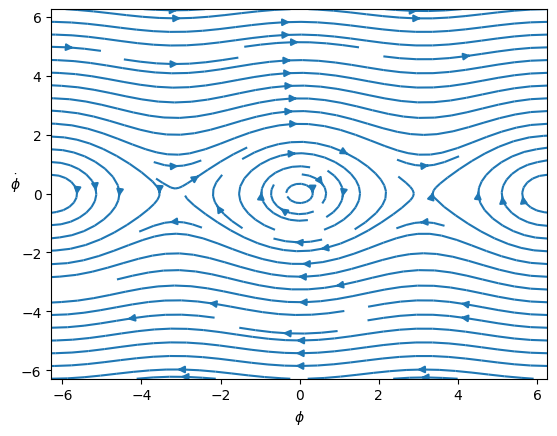

In [10]:
g = 9.81
L = 10.

grid_range = np.arange(-2*np.pi, 2*np.pi, 0.03)
xgrid, ygrid = np.meshgrid(grid_range, grid_range)
u = ygrid
v = -g * np.sin(xgrid) / L
plt.streamplot(xgrid, ygrid, u, v)
plt.xlabel("$\phi$")
plt.ylabel("$\dot \phi$", rotation=0)

### Nullclines

**Nullcline** - множество точек в фазовом пространстве, в которых производная хотя бы одной производной по вермени обращется в 0. Эти nullclines служат "стенами", которые разделяют фазовое пространство в множество смежных областей. Внутри каждой области знак производной по времени не меняется, так что определив знаки в одной точке, можно узнать знаки производных для всей области. Для нахождения nullclines нужно решить $dx/dt=0$ и $dy/dt=0$. Первое уравнение даст линии, в которых движение может происходить только по вертикали, а второе уравнение - линии, в которых движение может происходить только по горизонтали. Пересечения этих nullclines будут происходить в точках равновесия.

<img src="images/nullclines.png">

## Масштабирование переменных
Есть одно важное отличие в масштабировании неперерывных моделей в с равнении с дискретными: мы можем помимо прочих переменных, масштабировать также и время. Например, при мосштабировании переменной $x$ дискретной модели logistic growth, который содержал два параметра $r$ и $K$, мы избавились от одного параметра и в уравнении остался только $r$. В непрерывной модели мы можем избавиться и от $r$ за счет масштабирования времени. 

Рассмоотрим непрерывную модел logistic growth:
$$
\frac{dx}{dt} = rx \left( 1-\frac{x}{K} \right)
$$
произведем масштабирование обеих переменных:
$$
x \to \alpha x' \\
t \to \beta t'
$$
тогда уравнение преобразуется в 
$$
\frac{(\alpha dx')}{(\beta dt')} = r\alpha x' \left( 1-\frac{\alpha x'}{K} \right)
$$
после преобразования
$$
\frac{dx'}{dt'} = r \beta x' \left( 1-\frac{\alpha x'}{K} \right)
$$
при $\alpha = K$ и $\beta = 1/r$ получим
$$
\frac{dx'}{dt'} = x' \left( 1-x' \right)
$$
В результирующем уравнении нет параметров. Это означает, что в отличие от дискретного аналога, непрерывная модель logistic growth не меняет своего поведения при варьировании параметрами $r$ и $K$ - они лишь меняют масштаб траекторий вдоль $x$ и $t$.

## Асимптотическое поведение непрерывных линейных динамических систем

### Свойства линейных систем
Общая формула для непрерывных линейных динамических систем:
$$
\frac{d \mathbf x}{dt} = A \mathbf x
$$
Каждый компонент этого выражения является обыкновенным линейным дифференциальным уравнением, так что это просто векторная запись системы линейных дифференциальных уравнений.
Решением этой системы уравнений является
$$
\mathbf x(t) = e^{At} \mathbf x(0)
$$
где $e^X$ - экспонента квадратной матрицы $X$, которая определяется как
$$
e^X=\sum_{k=0}^{\infty} \frac{X^k}{k!}
$$
Данный ряд всегда сходится, так что экспонента от $X$ всегда корректно определена. $X^0$ равно единичной матрице. Заметим, что матрица $e^X$ имеет те же размеры, что и $X$.

Экспонента матрицы $e^X$ обладает некоторыми интересными свойствами. Во-первых, его собственные значения $\lambda'$ являются экспонентами собственных значений $\lambda$ самой матрицы $X$, т.е. $\lambda' = e^{\lambda}$. Во-вторых, его собственные векторы являются такими же, как и у вектора $X$:
$$
X \mathbf v = \lambda \mathbf v \quad \implies \quad e^X \mathbf v = e^{\lambda} \mathbf v
$$

### Асимптотическое поведение линейных систем
Мы можем использовать эти свойства для исследования асимптотического поведения. Предположим, что матрица $A$ является диагонализируемой и следовательно число его линейно независимых собственных векторов равно размерности $n$ пространства состояний. Тогда вектор начального состояния может быть представлен в виде линнейной комбинации собственных векторов:
$$
\mathbf x(0) = b_1 \mathbf v_1 + \ldots + b_n \mathbf v_n
$$
где $\mathbf v_i$ – собственные векторы матриц $A$ и $e^A$. Тогда состояние системы $\mathbf x(t)$ в момет времени $t$ может быть выражено
$$
\mathbf x(t) = b_1 e^{\lambda_1 t} \mathbf v_1 + \ldots + b_n e^{\lambda_n t} \mathbf v_n = \sum_{i=1}^n b_i e^{\lambda_i t} \mathbf v_i
$$
Сравнивая с дискретными моделями можно заметить, что здесь результат также показывает асимптотическое поведение, заданное суммированием слагаемых, содержащих $e^{\lambda_i}$ (в дискретном случае слагаемые содержаои $\lambda_i$). Таким образом, слагаемое, которое будет доминировать с ростом $t$, определяется абсолютным значением $e^{\lambda_i}$. В силу $|e^{\lambda_i}|=e^{\real (\lambda_i)}$, доминирующим собственным значением в непрерывных моделях будет значение с наибольшей реальной частью. Если доминирующим собственным значением является $\lambda_1$ то
$$
\lim_{t \to \infty} \mathbf x(t) = b_1 e^{\lambda_1 t} \mathbf v_1
$$

Подобно дискретным моделям, доминирующие собственное значение и собственный вектор говорят нам об асимптотическом поведении непрерывных моделей, но с некоторым отличием. Если реальная часть доминирующего вектора больше 0, то система будет уходить в бесконечность (и значит не будет устойчивой), а если меньше 0, то система сходится к нулю и является устойчивой. При равенстве доминирующего собственного значения нулю, компонент состояния системы, содержащий доминирующий собственный вектор, будет сходится к ненулевой точке равновесия. Эти рассуждения применимы и к недоминирующим собственным значениям.

Подробнее Sayama 122.

## Анализ линейной стабильности нелинейных систем
Рассмотрим динамическую систему, заданную нелинейным дифференциальным уравнением
$$
\frac{dx}{dt} = F(x)
$$
в точке равновесия $x_{eq}$, которая определяется уравнением $0=F(x_{eq})$. 
Для анализа линейной стабильности системы в точке равновесия, можно произвести похожие действия, которые производились для дискретных систем. Произведем замену
$$
x(t) \quad \implies \quad x_{eq} + \Delta x(t)
$$
тогда
$$
\frac{d(x_{eq}+\Delta x)}{dt} = \frac{d\Delta x}{dt} = F(x_{eq}+\Delta x)
$$
В линейном приближении функция в правой части может быть пердставленна так:
$$
F(x_{eq}+\Delta x) \approx F(x_{eq}) + F'(x_{eq}) \Delta x
$$
поэтому, с учетом $0=F(x_{eq})$:
$$
\frac{d\Delta x}{dt} \approx  F'(x_{eq}) \Delta x
$$
В многомерном случае, если модель задается системой дифференциальных уравнений
$$
\frac{d\mathbf x}{dt} = \mathbf F(x)
$$
получим
$$
\frac{d\Delta \mathbf x}{dt} \approx \mathbf J \Delta \mathbf x
$$
Где $\mathbf J$ - якобиан отображения $\mathbf F$ в точке равновесия $\mathbf x_{eq}$.

Для анализа стабильности непрерывной нелинейной модели модели нужно просизвести несколько шагов:
- найти точки равновесия, которые нас интересуют;
- вычислить якобиан в это точке равновесия;
- вычислить собственные значения $\lambda_i$ якобиана;
- на основе реальной части доминирующего собственного значения $\lambda_d$ можно сделать выводы:

<img src="images/equilibrium_points_2.png">
